In [1]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
candidate_cvs = [
    "Experienced data scientist with expertise in Python and machine learning algorithms.",
    "Motivated individual with strong analytical skills and a passion for research.",
    "Skilled machine learning specialist proficient in Python and TensorFlow.",
    "Seasoned data analyst with a proven track record of delivering actionable insights.",
    "Detail-oriented professional with excellent analytical skills, seeking data scientist position."
]

job_offers = [
    "Seeking a data scientist with experience in python and machine learning.",
    "We are looking for a motivated individual to join our dynamic research team.",
    "Seeking a skilled machine learning specialist proficient in Python.",
    "We are hiring a seasoned data analyst to join our growing team.",
    "Attention to detail and strong analytical skills required for our data scientist position.",
    ]

combined_data = candidate_cvs + job_offers

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(combined_data)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_matrix = cosine_similarity(embeddings)

In [4]:
num_candidates = len(candidate_cvs)
num_job_offers = len(job_offers)

candidate_sim_matrix = cos_sim_matrix[:num_candidates, num_candidates:]
job_offer_sim_matrix = cos_sim_matrix[num_candidates:, :num_candidates]

#user_item_interaction_matrix = candidate_sim_matrix  # Assuming each candidate's preference is based on job offers
#user-based matrix

user_item_interaction_matrix = job_offer_sim_matrix
#item-based matrix

In [5]:
user_item_interaction_matrix

array([[0.8663118 , 0.25093198, 0.69439083, 0.40653807, 0.5949106 ],
       [0.37207198, 0.61400175, 0.26250622, 0.3953189 , 0.44733837],
       [0.79169494, 0.22922269, 0.86152434, 0.309953  , 0.49834648],
       [0.5584575 , 0.3610868 , 0.41077852, 0.7025689 , 0.6516697 ],
       [0.5146328 , 0.52721906, 0.4252113 , 0.62267244, 0.69389975]],
      dtype=float32)

In [6]:
ground_truth_matrix = np.zeros_like(user_item_interaction_matrix)
ground_truth_matrix[0, 1] = 1  # Candidate 1 - interview for job offer 2
ground_truth_matrix[2, 3] = 1  # Candidate 3 - interview for job offer 4

In [7]:
from sklearn.metrics import roc_auc_score
# y-true is ground truth, y_score is the similarity

y_score = user_item_interaction_matrix.flatten()
y_true = ground_truth_matrix.flatten()

roc_auc = roc_auc_score(y_true, y_score)
print("ROC AUC:", roc_auc)

ROC AUC: 0.06521739130434784


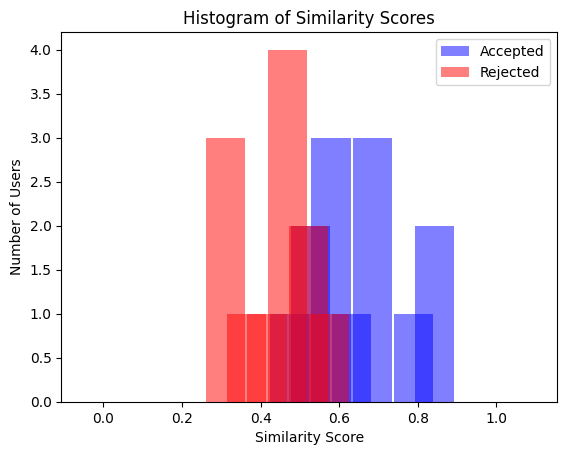

In [8]:
threshold = 0.5
accepted_users = user_item_interaction_matrix >= threshold
rejected_users = user_item_interaction_matrix < threshold

accepted_similarity_scores = user_item_interaction_matrix[accepted_users]
rejected_similarity_scores = user_item_interaction_matrix[rejected_users]

bins = np.linspace(0, 1, 20)

# number of accepted and rejected users for each similarity score range
accepted_hist, _ = np.histogram(accepted_similarity_scores, bins=bins)
rejected_hist, _ = np.histogram(rejected_similarity_scores, bins=bins)

plt.figure()
plt.bar(bins[:-1], accepted_hist, width=0.1, color='blue', alpha=0.5, label='Accepted')
plt.bar(bins[:-1] + 0.1, rejected_hist, width=0.1, color='red', alpha=0.5, label='Rejected')
plt.xlabel('Similarity Score')
plt.ylabel('Number of Users')
plt.title('Histogram of Similarity Scores')
plt.legend()
plt.show()